# Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
import datetime
from datetime import date 
import json
import sys
import time
from copy import deepcopy

np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)

# filepath = '/content/drive/MyDrive/Data Science/Python/Data/'
filepath = 'D:\Google Drive\Google Drive (charlieblog888)\IMV\Data Science\Python\Data\\'

prod_ratio = 0.02

# 2% or 5% file
# ext_c = '_' + str(prod_ratio)[3] + '.csv'
# ext_e= '_' + str(prod_ratio)[3] + '.xlsx'

# old file
ext_c = '.csv'
ext_e= '.xlsx'

In [2]:
file = filepath + 'Emp_Attrition (OHE-prod)' + ext_c

df = pd.read_csv(file)

# Webservice Function ( * open * )

In [3]:
import urllib.request
import json

serviceinput = 'input1'
serviceoutput = 'output1'

def empatt(js):
 
    input1 = {}
    input1[serviceinput] = []
    input1[serviceinput].append(v)

    data = {}
    data['Inputs'] = input1
    data['GlobalParameters'] = {}

    body = str.encode(json.dumps(data))
    
#     url = 'https://ussouthcentral.services.azureml.net/workspaces/325c5a06c97f40d7a12b46922c8e1952/services/5f084fb814ea4f39a9911c7697803311/execute?api-version=2.0&format=swagger'
    url = 'https://ussouthcentral.services.azureml.net/workspaces/325c5a06c97f40d7a12b46922c8e1952/services/5ac47ece04ff40438f96af4ed3a16854/execute?api-version=2.0&format=swagger'
    api_key = 'd3rApIlrRDJm6U+Nsdac3xujxps99cC8TAsYnOKQfS9MvL114ziUPAr6peADVpfHbKPzbaYLKI+v4lFqVFCuAg=='
    headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

    req = urllib.request.Request(url, body, headers)

    try:
        response = urllib.request.urlopen(req)
        result = response.read()
        return result

    except urllib.error.HTTPError as error:
        print("The request failed with status code: " + str(error.code))
        print(error.info())
        print(json.loads(error.read().decode("utf8", 'ignore')))        

# Submit Employee Attrition Webservice Requests ( * open * )

In [4]:
today = date.today()
e = datetime.datetime.now()

parsed = df.to_dict(orient='index')
dfo = pd.DataFrame()

# print(parsed)

for k,v in parsed.items():
        r = empatt(v)
        r = json.loads(r)
        r = r['Results'][serviceoutput][0]
        dftemp = pd.DataFrame.from_dict(r,orient ='index').transpose()
        dfo = dfo.append(dftemp,ignore_index=True)
        suc = 'Match' if dftemp.loc[0,'Attrition']==dftemp.loc[0,'Scored Labels'] else '* Mismatch *'
        print(f'Processing record = {k+1:3} of {len(parsed):3} {suc:10}')
    
file = filepath + 'Emp_Attrition (WebService Output)' + ext_c
dfo.to_csv(file,index=False)

Processing record =   1 of  30 Match     
Processing record =   2 of  30 Match     
Processing record =   3 of  30 Match     
Processing record =   4 of  30 Match     
Processing record =   5 of  30 Match     
Processing record =   6 of  30 Match     
Processing record =   7 of  30 Match     
Processing record =   8 of  30 Match     
Processing record =   9 of  30 Match     
Processing record =  10 of  30 Match     
Processing record =  11 of  30 Match     
Processing record =  12 of  30 Match     
Processing record =  13 of  30 Match     
Processing record =  14 of  30 Match     
Processing record =  15 of  30 Match     
Processing record =  16 of  30 Match     
Processing record =  17 of  30 Match     
Processing record =  18 of  30 Match     
Processing record =  19 of  30 Match     
Processing record =  20 of  30 Match     
Processing record =  21 of  30 Match     
Processing record =  22 of  30 * Mismatch *
Processing record =  23 of  30 Match     
Processing record =  24 of  30 M

In [5]:
dfo.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,...,Divorced,Married,Single,Scored Labels,Scored Probabilities
0,40,False,905,19,2,...,0,1,0,False,0.238019645214081
1,46,False,717,13,4,...,0,0,1,False,0.0429149717092514
2,49,False,1495,5,4,...,0,1,0,False,0.108841590583324


# Process Webservice Response

In [6]:
file = filepath + 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

dfsource = pd.read_csv(file,dtype = 'str')

In [7]:
dfz = pd.merge(dfo, dfsource, on=['Age','DailyRate','DistanceFromHome','Education'], how='inner')
dfz = dfz.reset_index(drop=True)

In [8]:
dropcol = ['Attrition_y','BusinessTravel', 'Department', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction_y', 'Gender', 'HourlyRate_y', \
       'JobInvolvement_y', 'JobLevel_y', 'JobRole', 'JobSatisfaction_y', 'MaritalStatus', 'MonthlyIncome_y', 'MonthlyRate_y', \
       'NumCompaniesWorked_y', 'Over18', 'OverTime_y', 'PercentSalaryHike_y','PerformanceRating_y', 'RelationshipSatisfaction_y', 'StandardHours', \
       'StockOptionLevel_y', 'TotalWorkingYears_y', 'TrainingTimesLastYear_y','WorkLifeBalance_y', 'YearsAtCompany_y', 'YearsInCurrentRole_y', \
       'YearsSinceLastPromotion_y', 'YearsWithCurrManager_y']
dfz.drop(columns=dropcol,inplace=True)
renamecol = ['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', \
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked','OverTime', 'PercentSalaryHike', 'PerformanceRating', \
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', \
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager','Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources', \
       'Research & Development', 'Sales', 'Human Resources_EducationField','Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree', \
       'Female', 'Male', 'Healthcare Representative','Human Resources_JobRole', 'Laboratory Technician', 'Manager', \
       'Manufacturing Director', 'Research Director', 'Research Scientist','Sales Executive', 'Sales Representative', 'Divorced', 'Married', \
       'Single', 'Scored Labels', 'Scored Probabilities','EmployeeNumber']
dfz.columns = renamecol

In [9]:
for i in dfz.columns:
    if not i in ['Attrition', 'OverTime', 'Scored Labels']:
        dfz[i] = dfz[i].astype(np.float64)

dfz['Attrition'] = dfz['Attrition'].astype(str).apply(lambda x: True if x in ['True'] else False)
dfz['OverTime'] = dfz['OverTime'].astype(str).apply(lambda x: True if x in ['True'] else False)
dfz['Scored Labels'] = dfz['Scored Labels'].astype(str).apply(lambda x: True if x in ['True'] else False)
dfz['EmployeeNumber'] = dfz['EmployeeNumber'].astype(np.int32)
dfz['PerformanceRating'] = dfz['PerformanceRating'].astype(np.int32)

# Display Employee Leave Prediction ( * open * )

In [10]:
print('\n\nEmployee who will *leave* with probablities of leaving\n')
empatt = dfz[['EmployeeNumber', 'PerformanceRating', 'Attrition', 'Scored Labels', 'Scored Probabilities']].sort_values('Scored Probabilities',ascending=False)
coln = ['EmployeeNumber', 'PerformanceRating', 'HR Score', 'Scored Labels', 'Scored Probabilities']
empatt.columns = coln
leave = empatt[empatt['Scored Labels']].reset_index(drop=True)
leave['Scored Labels'] = leave['Scored Labels'].apply(lambda x: 'Leave')
leave['HR Score'] = leave['HR Score'].apply(lambda x: 'Leave' if x==np.True_ else 'Stay')
leave



Employee who will *leave* with probablities of leaving



,EmployeeNumber,PerformanceRating,HR Score,Scored Labels,Scored Probabilities
0,492,3,Leave,Leave,0.569709
1,648,3,Leave,Leave,0.569686
2,932,4,Leave,Leave,0.562404
3,1419,3,Stay,Leave,0.522807


# Display Employee Stay Prediction ( * open * )

In [11]:
print('\n\nEmployee who will *stay* with probablities of staying\n')
empatt = dfz[['EmployeeNumber', 'PerformanceRating', 'Attrition', 'Scored Labels', 'Scored Probabilities']].sort_values('Scored Probabilities')
coln = ['EmployeeNumber', 'PerformanceRating', 'HR Score', 'Scored Labels', 'Scored Probabilities']
empatt.columns = coln
stay = empatt[~empatt['Scored Labels']].reset_index(drop=True)
stay['Scored Labels'] = stay['Scored Labels'].apply(lambda x: 'Stay')
stay['Scored Probabilities'] = stay['Scored Probabilities'].apply(lambda x: 1-x)
stay['HR Score'] = stay['HR Score'].apply(lambda x: 'Leave' if x==np.True_ else 'Stay')
stay



Employee who will *stay* with probablities of staying



,EmployeeNumber,PerformanceRating,HR Score,Scored Labels,Scored Probabilities
0,1618,3,Stay,Stay,0.977657
1,692,4,Stay,Stay,0.973445
2,1595,4,Stay,Stay,0.969739
3,338,3,Stay,Stay,0.961167
4,1727,3,Stay,Stay,0.957085
5,202,3,Stay,Stay,0.932794
6,951,4,Stay,Stay,0.922927
7,1802,3,Stay,Stay,0.917534
8,1922,3,Stay,Stay,0.911965
9,1805,3,Stay,Stay,0.909021


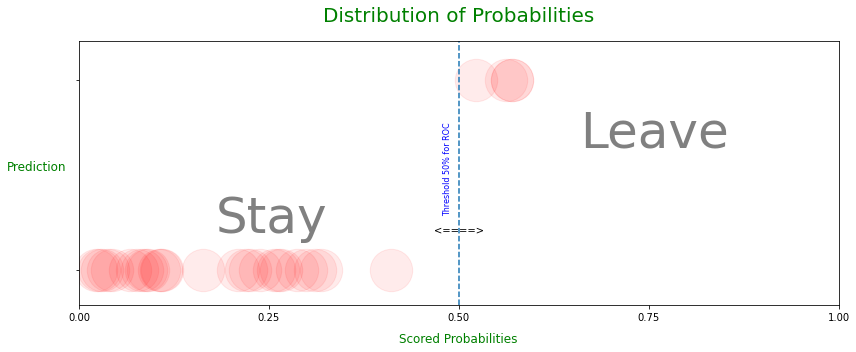

In [12]:
x = empatt['Scored Probabilities']
y = empatt['Scored Labels']

plt.figure(figsize=(12,5))
plt.title('Distribution of Probabilities',pad=20,color='g',fontsize=20)
plt.scatter(x,y,alpha=0.08,s=1800,color='r')
plt.axvline(x=0.5,ls='--')
plt.xlim(0,1)
plt.ylim(-0.18,1.2)
plt.xticks([0,0.25,0.5,0.75,1])
plt.yticks([0,1],['',''],color='g',fontsize=12)
plt.xlabel('Scored Probabilities',labelpad=10,color='g',fontsize=12)
plt.ylabel('Prediction',labelpad=35,rotation=0,color='g',fontsize=12)
plt.text(0.18,0.20,'Stay',fontsize=50,color='grey')
plt.text(0.66,0.65,'Leave',fontsize=50,color='grey')
plt.text(0.48,0.30,"Threshold 50% for ROC",rotation=90,c='b',fontsize=8)
plt.text(0.467,0.20,"<====>")
plt.tight_layout()
plt.show();

# Preparing Plot

In [13]:
file = filepath + 'Emp_Attrition (WebService Output EmpNo)' + ext_c
dfz.to_csv(file,index=False)

In [14]:
y_test = dfo['Attrition'] ; y_pred = dfo['Scored Labels']
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])
TP = cm.iloc[1,1] ; TN = cm.iloc[0,0] ; FP = cm.iloc[0,1] ; FN = cm.iloc[1,0] ; Accuracy = (TP + TN) / (TP + TN + FP + FN) ; Precision = TP / (TP + FP) ; Recall = TP / (TP + FN) ; F1 = (2 * Precision * Recall) / (Precision + Recall)

In [15]:
fileaz = filepath + 'Emp_Attrition (Azure Score).csv.csv'

dfaz = pd.read_csv(fileaz)

y_test2 = dfaz['Attrition']
y_pred2 = dfaz['Scored Labels']


In [16]:
y_test2 = y_test2.apply(lambda x: 1 if str(x) in ['True'] else 0)
y_pred2 = y_pred2.apply(lambda x: 1 if str(x) in ['True'] else 0)

In [17]:
auc2 = metrics.roc_auc_score(y_test2, y_pred2)
false_positive_rate2, true_positive_rate2, thresolds2 = metrics.roc_curve(y_test2, y_pred2)

In [18]:
from sklearn import metrics

y_pred1 = y_pred.apply(lambda x: 1 if x in ['True'] else 0)
y_test1 = y_test.apply(lambda x: 1 if x in ['True'] else 0)

auc = metrics.roc_auc_score(y_test1, y_pred1)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test1, y_pred1)

# AUCROC Plot and Scoring ( * open * )


Current datetime = 2021-06-04, 22:23:44


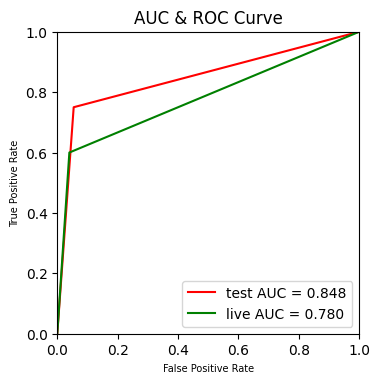

Accuracy  =  0.9   Precision =  0.75
Recall    =  0.6   F1        =  0.667


Predicted Result,False,True
Actual Result,,
False,24,1
True,2,3


In [19]:
print(f'\nCurrent datetime = {today}, {e.hour:02d}:{e.minute:02d}:{e.second:02d}')

plt.figure(figsize=(6, 4), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate2, true_positive_rate2, 'r', label=f'{"test"}{"AUC = ":>7s}{auc2:>0.3f}')
plt.plot(false_positive_rate, true_positive_rate, 'g',label=f'{"live"}{"AUC = ":>7s}{auc:>0.3f}')
plt.xlabel("False Positive Rate",fontsize=7)
plt.ylabel("True Positive Rate",fontsize=7)
plt.legend(loc='lower right')
plt.show();
print(f'Accuracy  =  {Accuracy:1.3}   Precision =  {Precision:1.3}')
print(f'Recall    =  {Recall:1.3}   F1        =  {F1:1.3}')
cm

# Backup

In [20]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report

# y_test = dfz["Attrition"]
# y_pred = dfz["Scored Labels"]

# cm = confusion_matrix(y_test,y_pred)
# # print(cm)
# # print(classification_report(y_test,y_pred))

# cm = pd.crosstab(y_test, y_pred, rownames=['Actual Result'], colnames=['Predicted Result'])

In [21]:
# plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)

# End

In [22]:
print('Done.')

Done.
